# Debiasing Projections

In [2]:
%%capture --no-stderr
!pip install -Uqq whatlies[all]
!pip install -Uqq spacy
!python3 -m spacy download en_core_web_md

In [ ]:
#@title ###Restart your runtime to reload the installed packages
import os
os.kill(os.getpid(), 9)

In [1]:
#@title ###Download fast text model "cc.en.300.bin"
import fasttext.util
fasttext.util.download_model("en", if_exists="ignore")

In [4]:
import spacy
import whatlies

from whatlies import Embedding, EmbeddingSet
from whatlies.language import FasttextLanguage, SpacyLanguage, BytePairLanguage

print("spacy", spacy.__version__, sep="\t\t")
print("whatlies", whatlies.__version__, sep="\t")

spacy		2.3.5
whatlies	0.5.10


## Meaning

In the word embedding space you might wonder if a direction in embedding space could represent meaning.

If $v_{man}$ represent the word embedding "man" and 
$v_{woman}$ represent the word embedding "woman". You could argue that the axis $v_{man}$ - $v_{woman}$ represents the "gender". 



In [5]:
lang_ft = FasttextLanguage("cc.en.300.bin")

In [12]:
len(lang_ft["he"].vector), lang_ft["he"].vector[:3]

(300, array([ 0.16648757, -0.05405492, -0.09685539], dtype=float32))

In [14]:
e1 = lang_ft["he"] - lang_ft["she"]
e2 = lang_ft["him"] - lang_ft["her"]
e3 = lang_ft["cat"] - lang_ft["dog"]


Calculate cosine distance

In [16]:
e1.distance(e2), e1.distance(e3)

(0.47087878, 1.0699434)

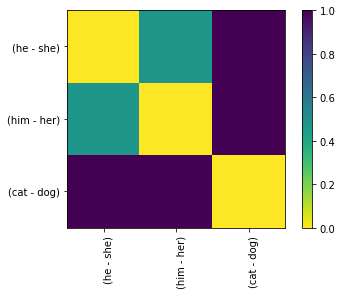

In [18]:
EmbeddingSet(e1, e2, e3).plot_distance(metric="cosine")

In [20]:
stereotype_pairs = [
    ("carpentry", "sewing"),
    ("physician", "nurse"),
    ("surgeon", "nurse"),
    ("doctor", "nurse"),
]

appropiate_pairs = [
    ("man", "woman"),
    ("brother", "sister"),
    ("father", "mother"),
    ("he", "she"),
    ("him", "her"),
    ("boy", "girl"),
]

random_pairs = [
    ("dog", "cat"),
    ("carpet", "leg"),
    ("hot", "cold")
]

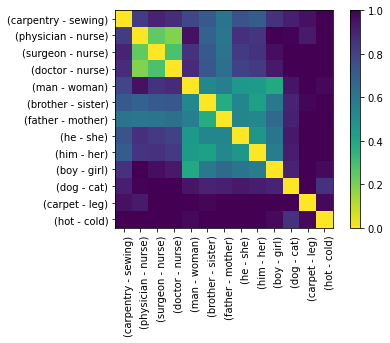

In [21]:
flatten = lambda l: [item for sublist in l for item in sublist]
pairs = [stereotype_pairs, appropiate_pairs, random_pairs]

def calc_axis(pair_list, language_model):
    return [language_model[t1] - language_model[t2] for (t1, t2) in pair_list]

def make_distance_plot(language_model):
    emb_pairs = EmbeddingSet(*flatten([calc_axis(p, language_model) for p in pairs]))
    emb_pairs.plot_distance(metric="cosine")

make_distance_plot(language_model=lang_ft)